# 3-Factor Personality Survey

In [1]:
from FictionalDataGenerator import MakeData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_theme(style="whitegrid")

In [2]:
# Create a personality survey with 3 factors
maker = MakeData(n_subjects=1100, seed=42)

In [3]:
# Add three personality factors
maker.add_factor(
    name="extraversion",
    n_items=5,
    distribution="normal",
    mean=3.0,
    std=1.2
).add_factor(
    name="agreeableness",
    n_items=5,
    distribution="normal",
    mean=3.5,
    std=0.9
).add_factor(
    name="conscientiousness",
    n_items=5,
    distribution="normal",
    mean=3.8,
    std=1.0
)

In [4]:
# Generate the data
df = maker.run()

In [5]:
# Calculate composite scores for each factor's items
for factor in ['extraversion', 'agreeableness', 'conscientiousness']:
    item_cols = [col for col in df.columns if col.startswith(f"{factor}_")]
    df[f"{factor}_score"] = df[item_cols].sum(axis=1)

In [6]:
# Compute correlation between items
corr_matrix = df.corr()

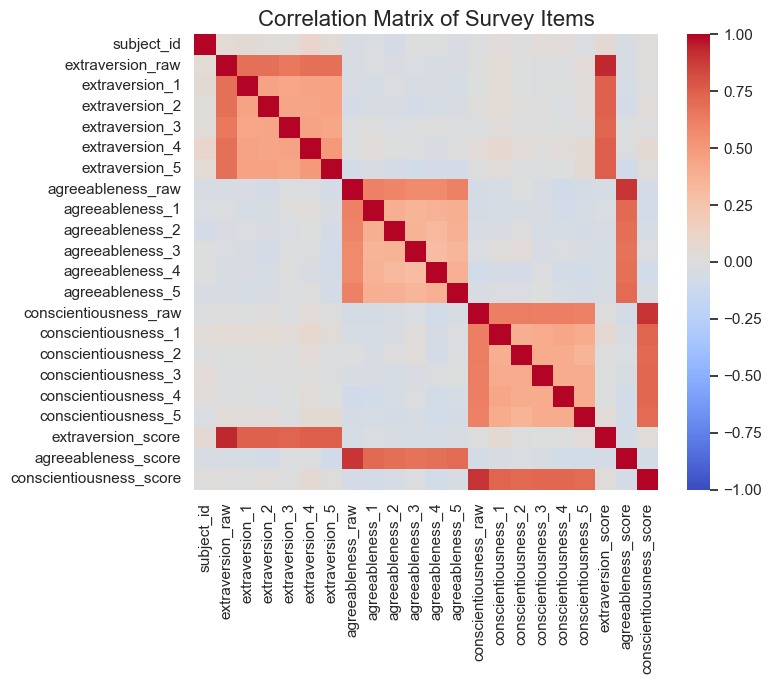

In [7]:
# Visualize correlation matrix using Seaborn
plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Survey Items', fontsize=16)
plt.tight_layout()

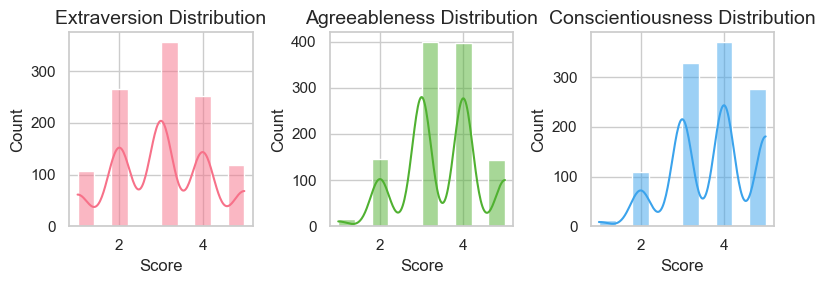

In [8]:
# Visualize the distribution of factor values
plt.figure(figsize=(8, 3))
factor_cols = ['extraversion_raw', 'agreeableness_raw', 'conscientiousness_raw']
for i, factor in enumerate(factor_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[factor], kde=True, 
                 color=sns.color_palette("husl", 3)[i-1],
                 bins=10)
    plt.title(f'{factor.capitalize().replace('_raw','')} Distribution', fontsize=14)
    plt.xlabel('Score', fontsize=12)
plt.tight_layout()
plt.show()

In [9]:
df

,subject_id,extraversion_raw,extraversion_1,extraversion_2,extraversion_3,extraversion_4,extraversion_5,agreeableness_raw,agreeableness_1,agreeableness_2,...,agreeableness_5,conscientiousness_raw,conscientiousness_1,conscientiousness_2,conscientiousness_3,conscientiousness_4,conscientiousness_5,extraversion_score,agreeableness_score,conscientiousness_score
0,1,4.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,...,5.0,2.0,3.0,2.0,3.0,2.0,1.0,27.0,29.0,13.0
1,2,3.0,5.0,3.0,2.0,3.0,1.0,3.0,4.0,3.0,...,5.0,4.0,4.0,4.0,3.0,2.0,2.0,17.0,22.0,19.0
2,3,4.0,5.0,2.0,2.0,5.0,5.0,2.0,2.0,1.0,...,4.0,4.0,2.0,4.0,5.0,5.0,4.0,23.0,11.0,24.0
3,4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,3.0,3.0,5.0,3.0,5.0,3.0,30.0,30.0,22.0
4,5,3.0,2.0,2.0,4.0,3.0,1.0,4.0,4.0,5.0,...,5.0,2.0,1.0,2.0,2.0,2.0,2.0,15.0,26.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,3.0,2.0,4.0,1.0,2.0,4.0,4.0,3.0,5.0,...,5.0,3.0,2.0,3.0,1.0,5.0,4.0,16.0,24.0,18.0
1096,1097,3.0,3.0,4.0,2.0,2.0,2.0,4.0,5.0,3.0,...,5.0,5.0,5.0,5.0,5.0,3.0,4.0,16.0,27.0,27.0
1097,1098,1.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,3.0,...,3.0,2.0,1.0,2.0,3.0,1.0,3.0,6.0,19.0,12.0
1098,1099,4.0,4.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,...,4.0,2.0,2.0,1.0,3.0,1.0,2.0,26.0,23.0,11.0


In [10]:
df.to_csv('Ex3FactorPersonality.csv', index=False)

In [11]:
df.sample(12).T

,405,147,662,7,478,374,815,265,121,429,461,460
subject_id,406.0,148.0,663.0,8.0,479.0,375.0,816.0,266.0,122.0,430.0,462.0,461.0
extraversion_raw,4.0,1.0,3.0,4.0,5.0,5.0,1.0,2.0,2.0,1.0,3.0,5.0
extraversion_1,5.0,1.0,3.0,5.0,4.0,4.0,1.0,2.0,4.0,3.0,2.0,5.0
extraversion_2,2.0,2.0,1.0,4.0,5.0,5.0,2.0,4.0,3.0,1.0,3.0,4.0
extraversion_3,4.0,1.0,3.0,4.0,5.0,5.0,1.0,2.0,2.0,1.0,2.0,3.0
extraversion_4,2.0,3.0,1.0,4.0,5.0,5.0,1.0,4.0,1.0,2.0,3.0,5.0
extraversion_5,4.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,1.0,5.0,5.0
agreeableness_raw,5.0,5.0,5.0,3.0,2.0,4.0,3.0,3.0,4.0,4.0,5.0,4.0
agreeableness_1,5.0,5.0,5.0,3.0,4.0,4.0,2.0,2.0,5.0,5.0,5.0,4.0
agreeableness_2,5.0,5.0,5.0,4.0,2.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0


In [12]:
df.columns

Index(['subject_id', 'extraversion_raw', 'extraversion_1', 'extraversion_2',
       'extraversion_3', 'extraversion_4', 'extraversion_5',
       'agreeableness_raw', 'agreeableness_1', 'agreeableness_2',
       'agreeableness_3', 'agreeableness_4', 'agreeableness_5',
       'conscientiousness_raw', 'conscientiousness_1', 'conscientiousness_2',
       'conscientiousness_3', 'conscientiousness_4', 'conscientiousness_5',
       'extraversion_score', 'agreeableness_score', 'conscientiousness_score'],
      dtype='object')